In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv


In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 1.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random as r
from wordcloud import WordCloud as wc

In [6]:
data= pd.read_csv("/kaggle/input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv")

In [7]:
data.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1


In [8]:
data[data["city"] == "Siliguri"].shape

(2113, 26)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [10]:
data.shape

(211944, 26)

In [11]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [12]:
data.drop_duplicates(["res_id"],keep = 'first',inplace = True)

In [13]:
data.shape

(55568, 26)

In [14]:
data[data["city"]=="Siliguri"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
183242,18878528,Sarada Biriyani House,['Casual Dining'],https://www.zomato.com/siliguri/sarada-biriyan...,"Gurung Basti, Nivideta Road, Pradhan Nagar, Si...",Siliguri,11327,Pradhan Nagar,26.725262,88.419155,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Lunc...",4.2,Very Good,374,23,0.0,1,-1
183243,18739692,Punjabi Kadhai,['Bar'],https://www.zomato.com/siliguri/punjabi-kadhai...,"Sidhi Arcade, Near Anandloke Hospital, Sevoke ...",Siliguri,11327,Janta Nagar,26.730707,88.430963,...,3,Rs.,"['Delivery', 'Credit Card', 'Cash', 'Takeaway ...",4.5,Excellent,218,143,0.0,1,-1
183244,18874863,CCFC,['Quick Bites'],https://www.zomato.com/siliguri/ccfc-khalpara?...,"Raja Rammohan Roy Road, RC apartment, Ward 12,...",Siliguri,11327,Khalpara,26.717040,88.428968,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.2,Very Good,260,34,0.0,-1,-1
183245,18881128,Zaika Biriyani House,['Quick Bites'],https://www.zomato.com/siliguri/zaika-biriyani...,"H/79/2/1/281, M.N Para, Ward 6, Burdwan Road, ...",Siliguri,11327,Khalpara,26.715140,88.420153,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.5,Excellent,356,23,0.0,1,-1
183246,18738438,Sher-E-Punjab Restaurant,['Casual Dining'],https://www.zomato.com/siliguri/sher-e-punjab-...,"Opposite Tenzing Norgey Bus Terminus, Pradhan ...",Siliguri,11327,Pradhan Nagar,26.725207,88.416331,...,2,Rs.,"['Takeaway Available', 'Debit Card', 'Lunch', ...",4.1,Very Good,267,48,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184628,18740893,Om Sai Hotel Cum Restaurant,['Quick Bites'],https://www.zomato.com/siliguri/om-sai-hotel-c...,"NJP Main Road, Nayapara, Siliguri",Siliguri,11327,Nayapara,26.685349,88.443601,...,1,Rs.,"['Cash', 'Dinner', 'Breakfast', 'No Alcohol Av...",0.0,Not rated,1,3,0.0,-1,-1
184630,18740992,Gupta Hotel,['Quick Bites'],https://www.zomato.com/siliguri/gupta-hotel-na...,"NJP, Opposite Railway Station, Bhaktinagar, Na...",Siliguri,11327,Nayapara,26.685098,88.442026,...,1,Rs.,"['Cash', 'Breakfast', 'No Alcohol Available', ...",0.0,Not rated,1,1,0.0,-1,-1
184631,18740915,Shivjee Hotel,['Quick Bites'],https://www.zomato.com/siliguri/shivjee-hotel-...,"NJP, Opposite Railway Station, Nayapara, Siliguri",Siliguri,11327,Nayapara,26.685260,88.443224,...,1,Rs.,"['Lunch', 'Dinner', 'No Alcohol Available', 'C...",0.0,Not rated,1,3,0.0,-1,-1
184632,18740943,Anjona Hotel,['Quick Bites'],https://www.zomato.com/siliguri/anjona-hotel-n...,"NJP, Opposite Railway Station, Ward 35, Nayapa...",Siliguri,11327,Nayapara,26.685240,88.442817,...,1,Rs.,"['No Alcohol Available', 'Cash', 'Breakfast', ...",0.0,Not rated,1,4,0.0,-1,-1


In [15]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [16]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [17]:
data["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [18]:
data['locality'].nunique()

3731

In [19]:
data['cuisines'].nunique()

9382

In [20]:
data['cuisines'] = data['cuisines'].fillna("No Cuisines")

In [21]:
data[data['cuisines']=='No Cuisines']

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
1140,3401673,Sri Dauji Mishthan Bhandar,['Sweet Shop'],https://www.zomato.com/agra/sri-dauji-mishthan...,"F11, Near Agrawal Hospital, Langre Ki Chowki, ...",Agra,34,Kamla Nagar,27.207933,78.025556,...,1,Rs.,"['Breakfast', 'Cash', 'Takeaway Available', 'I...",3.6,Good,23,0,0.0,-1,-1
7770,18689668,Vedanta Restaurant,['Casual Dining'],https://www.zomato.com/ajmer/vedanta-restauran...,"Hotel Metro Inn, Near Saint Francis Hospital, ...",Ajmer,11303,Railway Quarters,26.448262,74.638991,...,1,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Takeaway Ava...",0.0,Not rated,3,3,0.0,-1,-1
11389,19008079,Shree sweets,[],https://www.zomato.com/allahabad/shree-sweets-...,"6, Rambagh Hanuman Mandir, Allahabad",Allahabad,24,Rambagh,25.439095,81.847112,...,1,Rs.,[],0.0,Not rated,1,0,0.0,-1,-1
11390,19008131,Aditya Mishthan Bhandar,[],https://www.zomato.com/allahabad/aditya-mishth...,"153, South Malaka, Allahabad, Rambagh, Allahabad",Allahabad,24,Rambagh,25.440297,81.844704,...,1,Rs.,[],0.0,Not rated,1,0,0.0,-1,-1
11406,19008317,Gupta Mishthan Bhandar,[],https://www.zomato.com/allahabad/gupta-mishtha...,"1A/1A, Loknath, Chowk, Allahabad",Allahabad,24,Chowk,25.437404,81.834006,...,1,Rs.,[],0.0,Not rated,0,0,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192221,18838704,Sri Sai Manasa Tiffany's,['Casual Dining'],https://www.zomato.com/tirupati/sri-sai-manasa...,"Tilak Road, Tirupati - 517501, Tirumala, Tirupati",Tirupati,11323,Tirumala,13.635189,79.421430,...,1,Rs.,[],0.0,Not rated,0,0,0.0,-1,-1
192222,18837379,Shiva's Food Village,['Casual Dining'],https://www.zomato.com/tirupati/shivas-food-vi...,"395/A, 395/a, Avilala Road, Bairagi Patteda, T...",Tirupati,11323,Tirumala,13.618029,79.422673,...,1,Rs.,[],0.0,Not rated,0,0,0.0,-1,-1
192223,18837387,Hotel Garuda,['Casual Dining'],https://www.zomato.com/tirupati/hotel-garuda-t...,"Srikanth Lodge Complex, Pk Layout, Tirupati - ...",Tirupati,11323,Tirumala,13.631924,79.427555,...,1,Rs.,[],0.0,Not rated,0,0,0.0,-1,-1
193591,18797084,Falooda,['Dessert Parlour'],https://www.zomato.com/trichy/falooda-thillai-...,"18, Shasthri Road, Thillai Nagar, Trichy",Trichy,11332,Thillai Nagar,10.825654,78.686241,...,1,Rs.,"['Cash', 'Debit Card', 'Credit Card', 'Takeawa...",3.2,Average,12,8,0.0,1,-1


In [39]:
outlets = data['name'].value_counts()

In [24]:
outlets

Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: name, Length: 41100, dtype: int64

In [25]:
chains = outlets[outlets>=2]
singles = outlets[outlets == 1]

In [26]:
chains

Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: name, Length: 4890, dtype: int64

In [184]:
top10_chains = chains.head(10).sort_values(ascending=False)
top10_chains

Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: name, dtype: int64

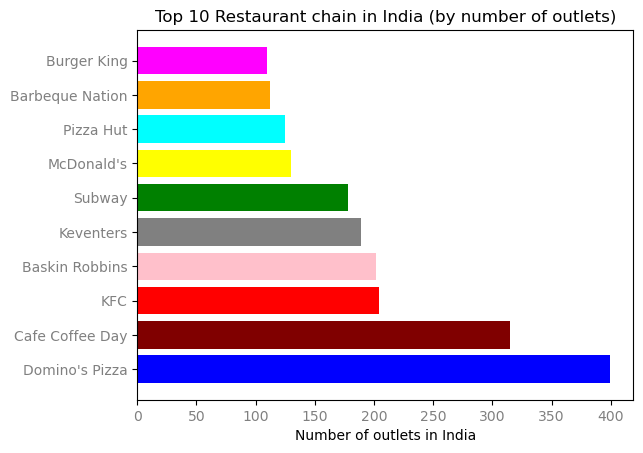

In [223]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))
ax = fig.gca()
colors = ["blue","maroon","red","pink","gray","green","yellow","cyan","orange","magenta"]
plt.barh(y_pos, height, color=colors)
plt.xticks(color="gray")
plt.yticks(y_pos, bars, color="gray")
plt.xlabel("Number of outlets in India")
plt.title("Top 10 Restaurant chain in India (by number of outlets)")
plt.show()

In [28]:
hometown =  data[data['city'] == 'Siliguri']

In [29]:
hometown.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
183242,18878528,Sarada Biriyani House,['Casual Dining'],https://www.zomato.com/siliguri/sarada-biriyan...,"Gurung Basti, Nivideta Road, Pradhan Nagar, Si...",Siliguri,11327,Pradhan Nagar,26.725262,88.419155,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Lunc...",4.2,Very Good,374,23,0.0,1,-1
183243,18739692,Punjabi Kadhai,['Bar'],https://www.zomato.com/siliguri/punjabi-kadhai...,"Sidhi Arcade, Near Anandloke Hospital, Sevoke ...",Siliguri,11327,Janta Nagar,26.730707,88.430963,...,3,Rs.,"['Delivery', 'Credit Card', 'Cash', 'Takeaway ...",4.5,Excellent,218,143,0.0,1,-1
183244,18874863,CCFC,['Quick Bites'],https://www.zomato.com/siliguri/ccfc-khalpara?...,"Raja Rammohan Roy Road, RC apartment, Ward 12,...",Siliguri,11327,Khalpara,26.717040,88.428968,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.2,Very Good,260,34,0.0,-1,-1
183245,18881128,Zaika Biriyani House,['Quick Bites'],https://www.zomato.com/siliguri/zaika-biriyani...,"H/79/2/1/281, M.N Para, Ward 6, Burdwan Road, ...",Siliguri,11327,Khalpara,26.715140,88.420153,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.5,Excellent,356,23,0.0,1,-1
183246,18738438,Sher-E-Punjab Restaurant,['Casual Dining'],https://www.zomato.com/siliguri/sher-e-punjab-...,"Opposite Tenzing Norgey Bus Terminus, Pradhan ...",Siliguri,11327,Pradhan Nagar,26.725207,88.416331,...,2,Rs.,"['Takeaway Available', 'Debit Card', 'Lunch', ...",4.1,Very Good,267,48,0.0,1,-1


In [121]:
hometown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 183242 to 184634
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                450 non-null    int64  
 1   name                  450 non-null    object 
 2   establishment         450 non-null    object 
 3   url                   450 non-null    object 
 4   address               450 non-null    object 
 5   city                  450 non-null    object 
 6   city_id               450 non-null    int64  
 7   locality              450 non-null    object 
 8   latitude              450 non-null    float64
 9   longitude             450 non-null    float64
 10  zipcode               32 non-null     object 
 11  country_id            450 non-null    int64  
 12  locality_verbose      450 non-null    object 
 13  cuisines              450 non-null    object 
 14  timings               423 non-null    object 
 15  average_cost_fo

In [63]:
hometown['establishment'].value_counts()


['Quick Bites']        180
['Casual Dining']       82
['Sweet Shop']          39
[]                      30
['Bhojanalya']          22
['Bakery']              22
['Bar']                 21
['Dessert Parlour']     12
['Café']                12
['Beverage Shop']       11
['Food Court']           8
['Dhaba']                5
['Butcher Shop']         2
['Lounge']               1
['Club']                 1
['Fine Dining']          1
['Kiosk']                1
Name: establishment, dtype: int64

In [343]:
hometown['establishment'] = hometown['establishment'] .replace({'[]':'[Multiple]'})

/tmp/ipykernel_32/3978308877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hometown['establishment'] = hometown['establishment'] .replace({'[]':'[Multiple]'})


In [344]:
types = hometown['establishment'].value_counts() 
types

['Quick Bites']        180
['Casual Dining']       82
['Sweet Shop']          39
[Multiple]              30
['Bhojanalya']          22
['Bakery']              22
['Bar']                 21
['Dessert Parlour']     12
['Café']                12
['Beverage Shop']       11
['Food Court']           8
['Dhaba']                5
['Butcher Shop']         2
['Lounge']               1
['Club']                 1
['Fine Dining']          1
['Kiosk']                1
Name: establishment, dtype: int64

<Axes: >

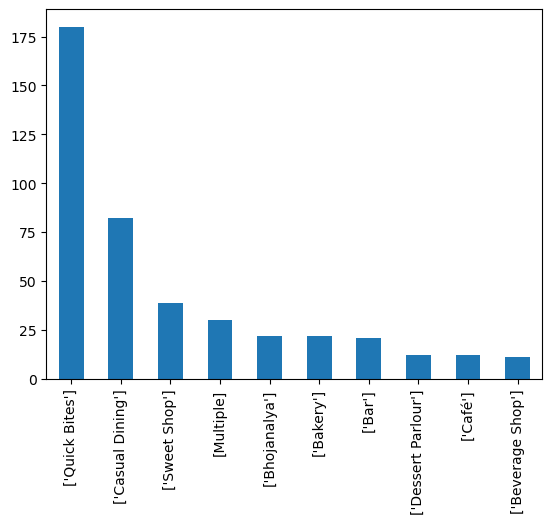

In [77]:
types.head(10).plot(kind='bar')

In [78]:
#We can aee that my hometown has maximum number of quickbites/Fast food type restaurants listed ion Zomato

In [88]:
nr = len(hometown[hometown['aggregate_rating'] == 0.0])
ra = len(hometown['aggregate_rating']>=0.0)
print(nr,ra)

165 450


In [95]:
perc = (int(nr)/int(ra))*100

print("Percentage of restaurants without a rating = ",round(perc),"%")

Percentage of restaurants without a rating =  37 %


In [113]:
chain = hometown['name'].value_counts()
c = 0
for x in chain:
    if x >= 3:
        c = c+1
print("No of chains in Siliguri = " ,c)
chainname =  chain[chain >= 3] 
print ("They are ")
chainname

No of chains in Siliguri =  8
They are 


Domino's Pizza             5
Makhan Bhog                4
Arya Bakery                3
Mio Amore                  3
KFC                        3
Top Tea House              3
Cafe Coffee Day            3
Pragya Fast Food Corner    3
Name: name, dtype: int64

In [114]:
#We can see that Dominoes is the most  Popular Food Chain company In Siliguri

In [129]:
hometown['average_cost_for_two'].sort_values(ascending = False)

183342    1600
183346    1500
183345    1500
183343    1500
183344    1500
          ... 
184623       0
184121       0
184018       0
183590       0
184009       0
Name: average_cost_for_two, Length: 450, dtype: int64

In [261]:
costtown = hometown[hometown['average_cost_for_two']!=0]
cost = costtown['average_cost_for_two']
cost.describe()

count     443.000000
mean      375.914221
std       289.045491
min        50.000000
25%       150.000000
50%       300.000000
75%       500.000000
max      1600.000000
Name: average_cost_for_two, dtype: float64

In [141]:
expensive = len(cost[cost>=1000])
mid_price = len(cost[cost>=500])-expensive
low_price = len(cost[cost<=500])
print("No of expensive restaurants in Siliguri = ",expensive,"\nNo of Mid Priced restaurants in Siliguri = ",mid_price,"\nNo of Cheap restaurants in Siliguri = ",low_price)

No of expensive restaurants in Siliguri =  25 
No of Mid Priced restaurants in Siliguri =  102 
No of Cheap restaurants in Siliguri =  348


In [221]:
loc = hometown['locality'].value_counts().head().sort_values(ascending=True)
hometown['locality'].value_counts()


Bankim Nagar                      110
Pradhan Nagar                      96
Khalpara                           92
Janta Nagar                        63
Patiram Jote                       44
Nayapara                           18
Ghogomali                           7
Subhas Pally                        6
Haidar Para                         4
Champasari                          4
Saktigarh                           3
Vega Circle Mall, Bankim Nagar      2
Cosmos Mall, Bankim Nagar           1
Name: locality, dtype: int64

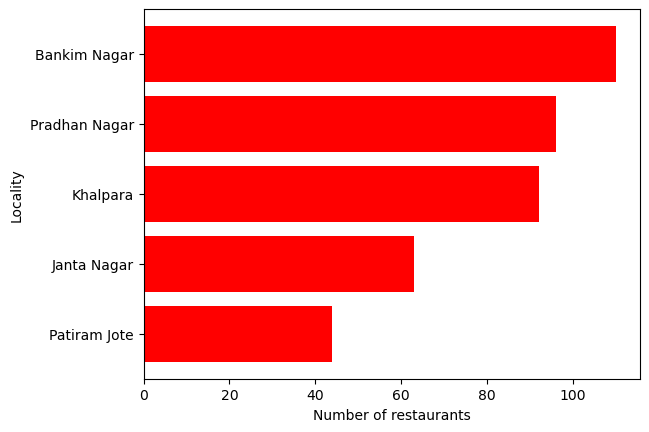

In [224]:
h = loc.values
b = loc.index
y = np.arange(len(b))
plt.barh(y,h,color = 'red')
plt.yticks(y,b)
plt.xlabel('Number of restaurants')
plt.ylabel('Locality')
plt.show()

In [ ]:
#We can see that most of the restaurants are in Bankim Nagar, Pradhan Nagar and Khalpara(almost 300 out of 450)

In [229]:
rating_by_est = hometown.groupby("name").mean()["aggregate_rating"].sort_values(ascending = False).head(10)
rating_by_est

/tmp/ipykernel_32/2922346291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_by_est = hometown.groupby("name").mean()["aggregate_rating"].sort_values(ascending = False).head(10)


name
Dhaba By Amber           4.8
Half Full                4.6
Zaika Biriyani House     4.5
Punjabi Kadhai           4.5
Open House Cafe & Pub    4.4
Barbeque Nation          4.4
Skkky                    4.3
The Barcode              4.3
The Green Bar            4.3
Sarada Biriyani House    4.2
Name: aggregate_rating, dtype: float64

In [ ]:
#Here we can see the top 10 best rated restaurants in Siliguri

In [232]:
vote_by_est = hometown.groupby("name").mean()["votes"].sort_values(ascending = False).head(10)
vote_by_est

/tmp/ipykernel_32/3971085735.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vote_by_est = hometown.groupby("name").mean()["votes"].sort_values(ascending = False).head(10)


name
Sarada Biriyani House       374.0
Zaika Biriyani House        356.0
Dhaba By Amber              306.0
Sagar Family Restaurant     269.0
Sher-E-Punjab Restaurant    267.0
CCFC                        260.0
Half Full                   254.0
Punjabi Kadhai              218.0
Paul Restaurant             153.0
Desi Galli Restaurant       146.0
Name: votes, dtype: float64

In [239]:
list1 = rating_by_est.index
list2 = vote_by_est.index
common_elements = [element for element in list1 if element in list2]
print(common_elements)

['Dhaba By Amber', 'Half Full', 'Zaika Biriyani House', 'Punjabi Kadhai', 'Sarada Biriyani House']


In [240]:
#We can conclude from the above analysis that 'Dhaba By Amber', 'Half Full', 'Zaika Biriyani House', 'Punjabi Kadhai'and  'Sarada Biriyani House' are the best places
#to eat in order from in siliguri as they have high ratings combined with a high number of votes

/tmp/ipykernel_32/300287841.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_by_loc = hometown.groupby('locality').mean()['aggregate_rating'].sort_values(ascending =False).head()


['Champasari', 'Bankim Nagar', 'Khalpara']


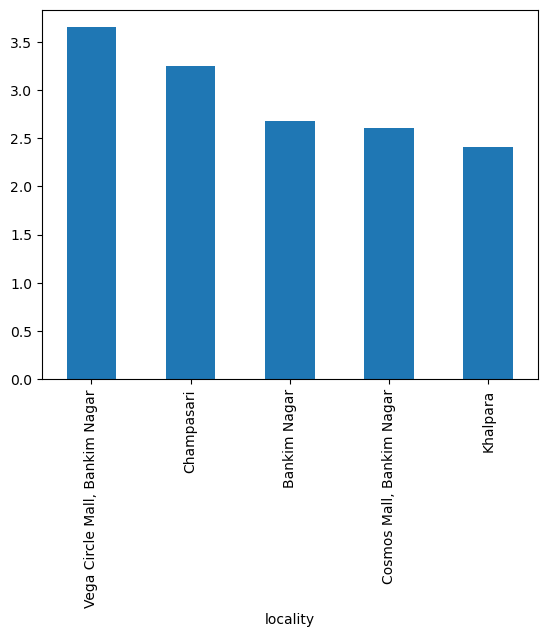

In [270]:
rating_by_loc = hometown.groupby('locality').mean()['aggregate_rating'].sort_values(ascending =False).head()
rating_by_loc.plot(kind='bar')


In [271]:
l1 = rating_by_loc.index
l2 = hometown['locality'].value_counts().head(10).index
common = [e for e in l1 if e in l2]
print(common)

['Champasari', 'Bankim Nagar', 'Khalpara']


In [272]:
#We conclude that Champasari, Bankim Nagar and Khalpara have the highest aggregate rating for restaurants. We exclude Vega Circle Mall and Cosmos mall because the number of restaurants there are very less

In [284]:
pics = hometown.groupby('name').mean()['photo_count'].sort_values(ascending = False)
picshow = pics[pics> 50]
picshow

/tmp/ipykernel_32/630117131.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pics = hometown.groupby('name').mean()['photo_count'].sort_values(ascending = False)


name
Half Full                       175.0
The Coffee Shop                 164.0
Punjabi Kadhai                  143.0
Steamy Moktu                    132.0
Walker's Village                130.0
Skkky                           118.0
Cafe Bohemia                    113.0
The Tribe                       107.0
Siliguri Kitchen                105.0
The Barcode                     102.0
The Green Bar                    99.0
Dhaba By Amber                   85.0
Brothers Garage Restaurant       77.0
The Yellow Chilli                73.0
Worth The Hype                   72.0
Barbeque Nation                  65.0
Open House Cafe & Pub            61.0
Rock C - Family Restaurant       59.0
Chainook                         58.0
The Haphazard                    58.0
Tamarynd Lounge & Restaurant     55.0
Around The Corner                54.0
Name: photo_count, dtype: float64

In [285]:
popular = [e for e in picshow.index if e in common_elements]
popular

['Half Full', 'Punjabi Kadhai', 'Dhaba By Amber']

In [ ]:
#'Half Full', 'Punjabi Kadhai'and 'Dhaba By Amber' are the best places to order from Zomato as they have high Ratings, Lots of votes and Lots of pictures

<Axes: >

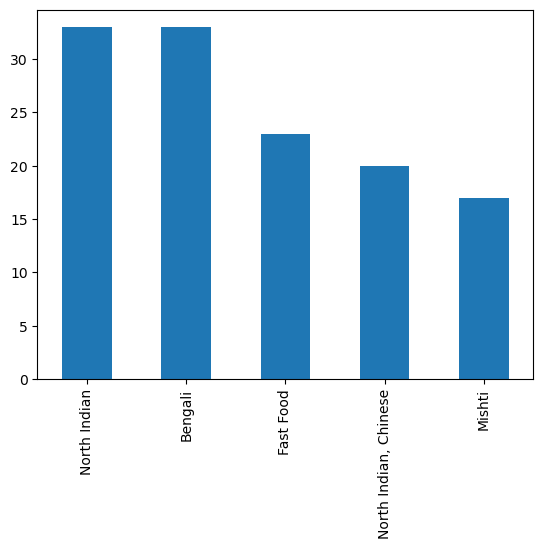

In [308]:
cuisine = hometown['cuisines'].value_counts()
cuisine =  cuisine[cuisine>5]
cuisine = cuisine[cuisine.index !='No Cuisines']
cuisine.head().plot(kind = 'bar')

In [309]:
#We can see that North Indian, bengali and Fast Foods restaurants are the most prevalent in Siliguri on Zomato

In [316]:
rate_by_q = hometown.groupby('cuisines').mean()['aggregate_rating'].sort_values(ascending =False).head(10)
rate_by_q

/tmp/ipykernel_32/192128921.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rate_by_q = hometown.groupby('cuisines').mean()['aggregate_rating'].sort_values(ascending =False).head(10)


cuisines
North Indian, Beverages, Chinese, Continental, Healthy Food    4.5
North Indian, Italian, Finger Food, Chinese, Pizza, Momos      4.4
North Indian, Chinese, BBQ                                     4.4
North Indian, Pizza                                            4.3
Chinese, Italian, Pizza, Continental                           4.3
North Indian, Fast Food, Salad                                 4.2
Italian                                                        4.1
Sandwich, North Indian                                         4.1
Juices, Desserts                                               4.1
Continental, North Indian, Asian                               4.1
Name: aggregate_rating, dtype: float64

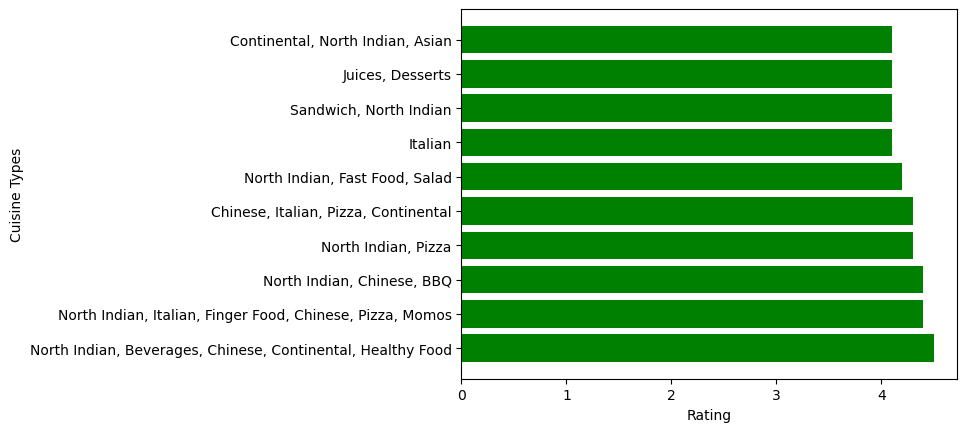

In [323]:
h = rate_by_q.values
b = rate_by_q.index
y = np.arange(len(b))
plt.barh(y,h,color = 'green')
plt.yticks(y,b)
plt.xlabel('Rating')
plt.ylabel('Cuisine Types')
plt.show()

In [324]:
#We can see that places serving Noth Indian, Chinese and Italian Food has the highest rating hence overall stating that this is the favourite cuisine of the town

In [330]:
hometown['highlights'].iloc[1]

"['Delivery', 'Credit Card', 'Cash', 'Takeaway Available', 'Debit Card', 'Rooftop', 'Air Conditioned', 'Table booking recommended']"

/tmp/ipykernel_32/1173490671.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hometown['aggregate_rating'], shade=True)


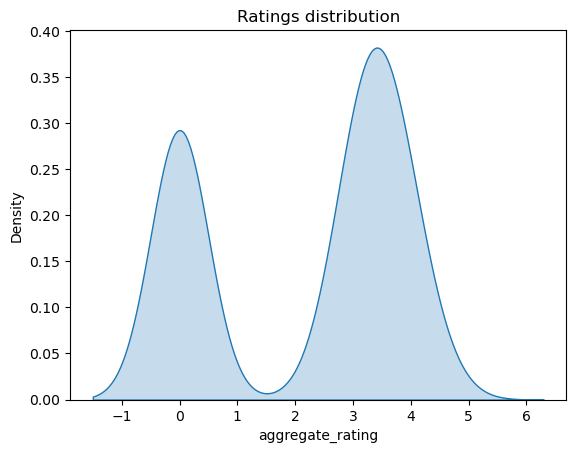

In [333]:
sns.kdeplot(hometown['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

In [ ]:
#We can see that msot restaurantss are rated between 3 and 4 stars

/tmp/ipykernel_32/3771918437.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)


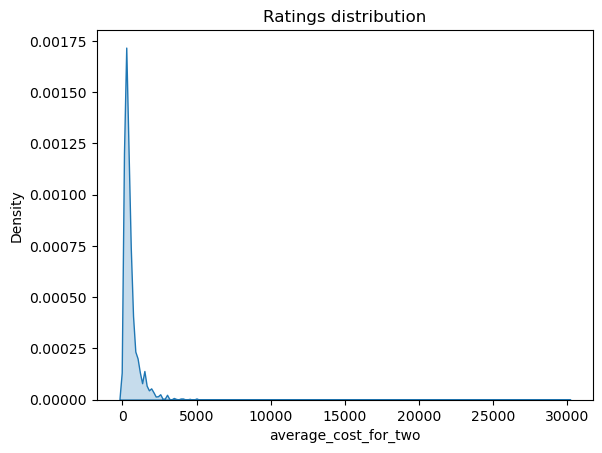

In [334]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.title("Ratings distribution")
plt.show()

In [ ]:
#As few restaurants are very expensive(Rs 25000+) that is why thsi graph is very skewed.

In [339]:
homecostnotzero = hometown[hometown['average_cost_for_two']>0]
homecostnotzero
#removing allrestaurants with cost as 0

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,highlights2
183242,18878528,Sarada Biriyani House,['Casual Dining'],https://www.zomato.com/siliguri/sarada-biriyan...,"Gurung Basti, Nivideta Road, Pradhan Nagar, Si...",Siliguri,11327,Pradhan Nagar,26.725262,88.419155,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Lunc...",4.2,Very Good,374,23,0.0,1,-1,"[Dinner, Cash, Takeaway Available, Lunch, Deli..."
183243,18739692,Punjabi Kadhai,['Bar'],https://www.zomato.com/siliguri/punjabi-kadhai...,"Sidhi Arcade, Near Anandloke Hospital, Sevoke ...",Siliguri,11327,Janta Nagar,26.730707,88.430963,...,Rs.,"['Delivery', 'Credit Card', 'Cash', 'Takeaway ...",4.5,Excellent,218,143,0.0,1,-1,"[Delivery, Credit Card, Cash, Takeaway Availab..."
183244,18874863,CCFC,['Quick Bites'],https://www.zomato.com/siliguri/ccfc-khalpara?...,"Raja Rammohan Roy Road, RC apartment, Ward 12,...",Siliguri,11327,Khalpara,26.717040,88.428968,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.2,Very Good,260,34,0.0,-1,-1,"[Dinner, Cash, Takeaway Available, Debit Card,..."
183245,18881128,Zaika Biriyani House,['Quick Bites'],https://www.zomato.com/siliguri/zaika-biriyani...,"H/79/2/1/281, M.N Para, Ward 6, Burdwan Road, ...",Siliguri,11327,Khalpara,26.715140,88.420153,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.5,Excellent,356,23,0.0,1,-1,"[Dinner, Cash, Takeaway Available, Debit Card,..."
183246,18738438,Sher-E-Punjab Restaurant,['Casual Dining'],https://www.zomato.com/siliguri/sher-e-punjab-...,"Opposite Tenzing Norgey Bus Terminus, Pradhan ...",Siliguri,11327,Pradhan Nagar,26.725207,88.416331,...,Rs.,"['Takeaway Available', 'Debit Card', 'Lunch', ...",4.1,Very Good,267,48,0.0,1,-1,"[Takeaway Available, Debit Card, Lunch, Breakf..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184628,18740893,Om Sai Hotel Cum Restaurant,['Quick Bites'],https://www.zomato.com/siliguri/om-sai-hotel-c...,"NJP Main Road, Nayapara, Siliguri",Siliguri,11327,Nayapara,26.685349,88.443601,...,Rs.,"['Cash', 'Dinner', 'Breakfast', 'No Alcohol Av...",0.0,Not rated,1,3,0.0,-1,-1,"[Cash, Dinner, Breakfast, No Alcohol Available..."
184630,18740992,Gupta Hotel,['Quick Bites'],https://www.zomato.com/siliguri/gupta-hotel-na...,"NJP, Opposite Railway Station, Bhaktinagar, Na...",Siliguri,11327,Nayapara,26.685098,88.442026,...,Rs.,"['Cash', 'Breakfast', 'No Alcohol Available', ...",0.0,Not rated,1,1,0.0,-1,-1,"[Cash, Breakfast, No Alcohol Available, Lunch,..."
184631,18740915,Shivjee Hotel,['Quick Bites'],https://www.zomato.com/siliguri/shivjee-hotel-...,"NJP, Opposite Railway Station, Nayapara, Siliguri",Siliguri,11327,Nayapara,26.685260,88.443224,...,Rs.,"['Lunch', 'Dinner', 'No Alcohol Available', 'C...",0.0,Not rated,1,3,0.0,-1,-1,"[Lunch, Dinner, No Alcohol Available, Cash, Br..."
184632,18740943,Anjona Hotel,['Quick Bites'],https://www.zomato.com/siliguri/anjona-hotel-n...,"NJP, Opposite Railway Station, Ward 35, Nayapa...",Siliguri,11327,Nayapara,26.685240,88.442817,...,Rs.,"['No Alcohol Available', 'Cash', 'Breakfast', ...",0.0,Not rated,1,4,0.0,-1,-1,"[No Alcohol Available, Cash, Breakfast, Lunch,..."


homecostnotzero

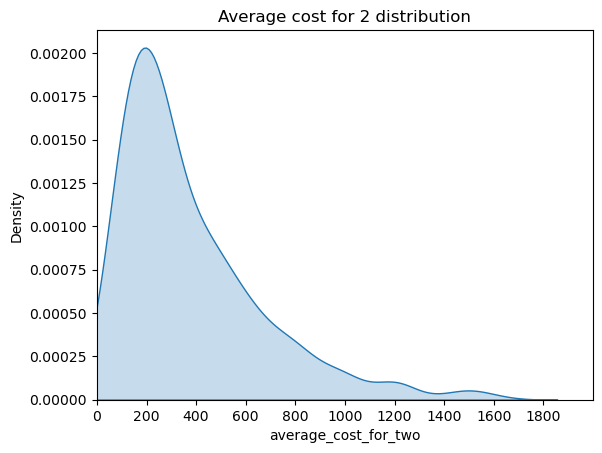

In [341]:

sns.kdeplot(homecostnotzero['average_cost_for_two'], fill=True)
plt.xlim([0, 2000])
plt.xticks(range(0,2000,200))
plt.title("Average cost for 2 distribution")
plt.show()

In [ ]:
#We can see most of the restaurants cost 200 to 400 for two which is quite affordable

CONCLUSIONS
The most number of Restaurants in Siliguri is Operated by Dominoes
The best places to order from Zomato when in Siliguri are -